Task implemented -

1. Training Sklerans's LogisticRegression,DecisionTreeClassifier, XGBClassifier, RandomForestClassifier for classification task (between anomolic and non anomolic data)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
features_imp_full = ['voltage__c3__lag_1', 'voltage__abs_energy', 'voltage__sample_entropy', 'voltage__approximate_entropy__m_2__r_0.1', 'voltage__approximate_entropy__m_2__r_0.3', 'voltage__approximate_entropy__m_2__r_0.5', 'voltage__approximate_entropy__m_2__r_0.7','voltage__matrix_profile__feature_"min"__threshold_0.98' ,   'voltage__matrix_profile__feature_"25"__threshold_0.98', 'voltage__benford_correlation', 'voltage__cid_ce__normalize_False','voltage__kurtosis', 'voltage__skewness','voltage__sum_values', 'voltage__root_mean_square', 'voltage__mean_abs_change', 'voltage__mean' , 'voltage__number_cwt_peaks__n_5','voltage__variance', 'voltage__variation_coefficient',  'welding speed', 'max_value' ]

features_imp = ['voltage__abs_energy', 'voltage__sample_entropy', 'voltage__approximate_entropy__m_2__r_0.1','voltage__matrix_profile__feature_"min"__threshold_0.98' ,   'voltage__matrix_profile__feature_"25"__threshold_0.98', 'voltage__benford_correlation', 'voltage__cid_ce__normalize_False','voltage__kurtosis', 'voltage__sum_values',  'voltage__mean_abs_change', 'voltage__number_cwt_peaks__n_5','voltage__variance', 'welding speed', 'max_value' ]

def feature_list(features_imp):
    length_list = len(features_imp)
    for i in range(length_list):
        print(i, features_imp[i])

feature_list(features_imp)
print('full feature list')
feature_list(features_imp_full)




0 voltage__abs_energy
1 voltage__sample_entropy
2 voltage__approximate_entropy__m_2__r_0.1
3 voltage__matrix_profile__feature_"min"__threshold_0.98
4 voltage__matrix_profile__feature_"25"__threshold_0.98
5 voltage__benford_correlation
6 voltage__cid_ce__normalize_False
7 voltage__kurtosis
8 voltage__sum_values
9 voltage__mean_abs_change
10 voltage__number_cwt_peaks__n_5
11 voltage__variance
12 welding speed
13 max_value
full feature list
0 voltage__c3__lag_1
1 voltage__abs_energy
2 voltage__sample_entropy
3 voltage__approximate_entropy__m_2__r_0.1
4 voltage__approximate_entropy__m_2__r_0.3
5 voltage__approximate_entropy__m_2__r_0.5
6 voltage__approximate_entropy__m_2__r_0.7
7 voltage__matrix_profile__feature_"min"__threshold_0.98
8 voltage__matrix_profile__feature_"25"__threshold_0.98
9 voltage__benford_correlation
10 voltage__cid_ce__normalize_False
11 voltage__kurtosis
12 voltage__skewness
13 voltage__sum_values
14 voltage__root_mean_square
15 voltage__mean_abs_change
16 voltage__mea

In [3]:
data_file = r'path1'
def data_preparation(data_file ):

    data_1sec = pd.read_excel(data_file)

    data_1sec = data_1sec[(data_1sec['layer_no'] > 3) & (data_1sec['layer_no'] < 51)]

    data_1sec['target'] = 0

    list_non_anomolic = list(range(4,47))
    list_anomolic = [47, 48, 49, 50]
    for i, row in data_1sec.iterrows():
        data_5= data_1sec['layer_no'].loc[i]
        if data_5 in list_non_anomolic:
            data_1sec.at[i,'target']= 1
        else:
            data_1sec.at[i,'target']= 0

    return data_1sec





In [4]:


data_1sec = data_preparation(data_file)
y = data_1sec['target']
data_2 = data_1sec[features_imp]
data_3 = data_1sec[features_imp_full]


def type_normalization(normalization=True, standarization= False, features = features_imp, data_frame = data_2):
    if normalization:
        print('+++++++++   Normalization  +++++++++++')
        min_max_scaler = MinMaxScaler()
        normalized_data_non_anomolus = min_max_scaler.fit_transform(data_frame[features])
        return normalized_data_non_anomolus
    
    elif standarization:
        scaler = StandardScaler()
        print('+++++++++   Standarization  +++++++++++')
        normalized_data_non_anomolus = scaler.fit_transform(data_frame[features])
        return normalized_data_non_anomolus

In [5]:

normalized_data_non_anomolus = type_normalization(normalization=True, standarization= False, features= features_imp, data_frame=data_2)

X_train, X_test, y_train, y_test = train_test_split(normalized_data_non_anomolus, y, test_size=0.33, random_state=42, shuffle=True)

print(y_test[100:200])



+++++++++   Normalization  +++++++++++
6117    1
4225    1
3810    1
1174    1
2796    1
       ..
584     1
1257    1
4521    1
1368    1
2995    1
Name: target, Length: 100, dtype: int64


In [6]:


def type_model(model_name, feature_list = features_imp):

	if model_name == LogisticRegression:

		model = LogisticRegression()

		# fit the model
		model.fit(X_train, y_train)

		ynew = model.predict(X_test)

		ytes2 = model.predict(X_test[100:200])
		print(ytes2)

		print(classification_report(y_test, ynew))

		accuracy_score(y_test, ynew)


		# get importance
		#importance = model.feature_importances_
		importance = model.coef_[0]
		# summarize feature importance
		import_dict = {}
		for i,v in enumerate(importance):
			#print('Feature: {}, Score: {}'.format(feature_list[i], round(v, 5)))
			import_dict[feature_list[i]] = round(v, 5)

		for key, value in import_dict.items():
			import_dict[key] = abs(value)
			


		importance = dict(sorted(import_dict.items(), key=lambda item: item[1], reverse = True))
		names = list(importance.keys())
		values = list(importance.values())
		# plot feature importance
		print(importance)
		plt.bar(range(len(importance)), values, tick_label=names)
		plt.xticks(rotation=90)
		plt.show()
		# pyplot.bar([x for x in range(len(importance))], importance)
		# pyplot.show()

	elif model_name == XGBClassifier:
			model = XGBClassifier()
			# model = RandomForestClassifier()
			# model = DecisionTreeClassifier()
			# model = LogisticRegression()

			# fit the model
			model.fit(X_train, y_train)

			ynew = model.predict(X_test)

			ytes2 = model.predict(X_test[100:200])
			print(ytes2)

			print(classification_report(y_test, ynew))

			accuracy_score(y_test, ynew)


			# get importance
			importance = model.feature_importances_
			#importance = model.coef_[0]
			# summarize feature importance
			import_dict = {}
			for i,v in enumerate(importance):
				#print('Feature: {}, Score: {}'.format(feature_list[i], round(v, 5)))
				import_dict[feature_list[i]] = round(v, 5)


			importance = dict(sorted(import_dict.items(), key=lambda item: item[1], reverse = True))
			names = list(importance.keys())
			values = list(importance.values())
			# plot feature importance
			print(importance)
			plt.bar(range(len(importance)), values, tick_label=names)
			plt.xticks(rotation=90)
			plt.show()

	elif model_name == RandomForestClassifier:
					# model = XGBClassifier()
			model = RandomForestClassifier()
			# model = DecisionTreeClassifier()
			# model = LogisticRegression()

			# fit the model
			model.fit(X_train, y_train)

			ynew = model.predict(X_test)
			ytes2 = model.predict(X_test[100:200])
			print(ytes2)

			print(classification_report(y_test, ynew))

			accuracy_score(y_test, ynew)


			# get importance
			importance = model.feature_importances_
			#importance = model.coef_[0]
			# summarize feature importance
			import_dict = {}
			for i,v in enumerate(importance):
				#print('Feature: {}, Score: {}'.format(feature_list[i], round(v, 5)))
				import_dict[feature_list[i]] = round(v, 5)


			importance = dict(sorted(import_dict.items(), key=lambda item: item[1], reverse = True))
			names = list(importance.keys())
			values = list(importance.values())
			# plot feature importance
			print(importance)
			plt.bar(range(len(importance)), values, tick_label=names)
			plt.xticks(rotation=90)
			plt.show()

	elif model_name == DecisionTreeClassifier:
			model = DecisionTreeClassifier()
				# model = LogisticRegression()

				# fit the model
			model.fit(X_train, y_train)

			ynew = model.predict(X_test)
			ytes2 = model.predict(X_test[100:200])
			print(ytes2)

			print(classification_report(y_test, ynew))

			accuracy_score(y_test, ynew)


				# get importance
			importance = model.feature_importances_
				#importance = model.coef_[0]
				# summarize feature importance
			import_dict = {}
			for i,v in enumerate(importance):
				#print('Feature: {}, Score: {}'.format(feature_list[i], round(v, 5)))
				import_dict[feature_list[i]] = round(v, 5)


			importance = dict(sorted(import_dict.items(), key=lambda item: item[1], reverse = True))
			names = list(importance.keys())
			values = list(importance.values())
			# plot feature importance
			print(importance)
			plt.bar(range(len(importance)), values, tick_label=names)
			plt.xticks(rotation=90)
			plt.show()
	

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       205
           1       0.99      1.00      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.98      0.94      0.96      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__variance': 7.45589, 'voltage__benford_correlation': 4.4746, 'voltage__approximate_entropy__m_2__r_0.1': 3.97797, 'max_value': 3.81372, 'voltage__abs_energy': 2.49741, 'voltage__mean_abs_change': 1.98278, 'voltage__sample_entropy': 1.56795, 'voltage__number_cwt_peaks__n_5': 1.26443, 'voltage__sum_values': 1.06565, 'voltage__matrix_profile__feature_"min"__threshold_0.98': 0.96328, 'voltage__matrix_profile__feature_"25"__threshold_0.98': 0.70937, 'voltage__

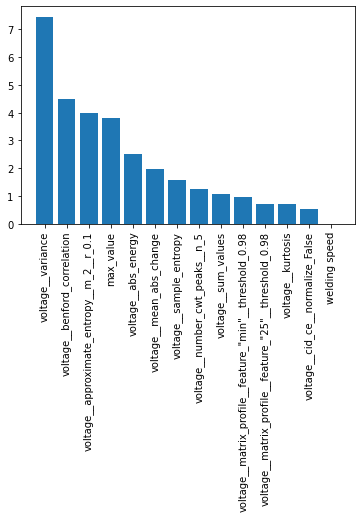

In [7]:
type_model(LogisticRegression, feature_list = features_imp )

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       205
           1       0.99      0.99      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.96      0.97      0.97      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__variance': 0.28026, 'voltage__abs_energy': 0.23736, 'max_value': 0.1543, 'voltage__approximate_entropy__m_2__r_0.1': 0.08845, 'voltage__mean_abs_change': 0.07827, 'voltage__benford_correlation': 0.05696, 'voltage__sample_entropy': 0.03345, 'voltage__sum_values': 0.02499, 'voltage__kurtosis': 0.01297, 'voltage__cid_ce__normalize_False': 0.01214, 'voltage__matrix_profile__feature_"min"__threshold_0.98': 0.00942, 'voltage__matrix_profile__feature_"25"__thre

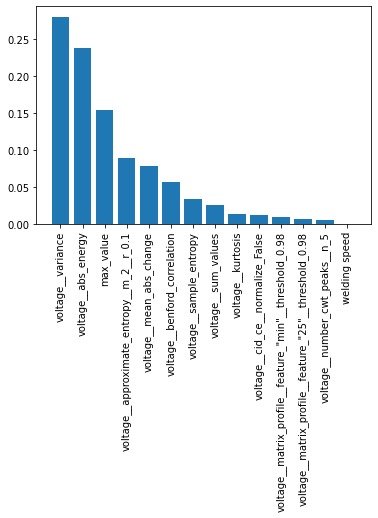

In [8]:
type_model(RandomForestClassifier,feature_list = features_imp )

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       205
           1       0.99      0.99      0.99      2116

    accuracy                           0.98      2321
   macro avg       0.95      0.95      0.95      2321
weighted avg       0.98      0.98      0.98      2321

{'voltage__variance': 0.89562, 'voltage__kurtosis': 0.02627, 'max_value': 0.01877, 'voltage__mean_abs_change': 0.01728, 'voltage__benford_correlation': 0.01049, 'voltage__sum_values': 0.00795, 'voltage__approximate_entropy__m_2__r_0.1': 0.00747, 'voltage__matrix_profile__feature_"25"__threshold_0.98': 0.00477, 'voltage__abs_energy': 0.00436, 'voltage__number_cwt_peaks__n_5': 0.00261, 'voltage__matrix_profile__feature_"min"__threshold_0.98': 0.00232, 'voltage__sampl

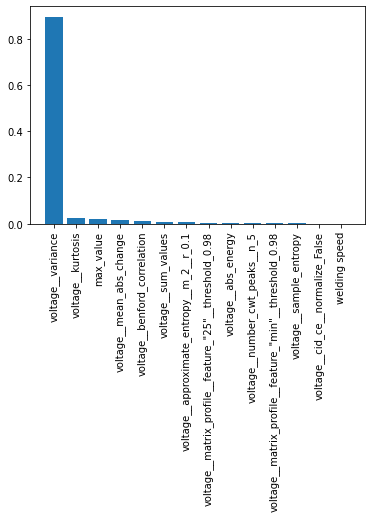

In [9]:
type_model(DecisionTreeClassifier, feature_list = features_imp)

c:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\test\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       205
           1       0.99      0.99      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.97      0.97      0.97      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__variance': 0.77011, 'voltage__kurtosis': 0.04691, 'max_value': 0.03696, 'voltage__sample_entropy': 0.02522, 'voltage__approximate_entropy__m_2__r_0.

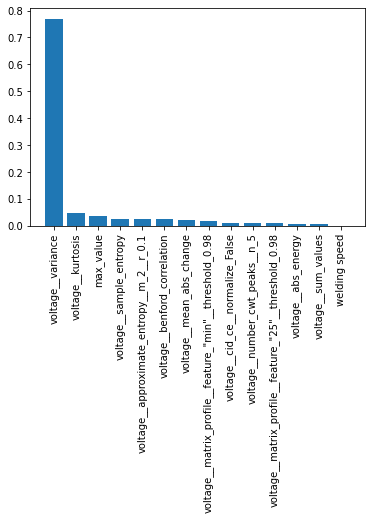

In [10]:
type_model(XGBClassifier, feature_list = features_imp)

In [11]:
normalized_data_non_anomolus = type_normalization(normalization=False, standarization= True, features= features_imp, data_frame=data_2)

X_train, X_test, y_train, y_test = train_test_split(normalized_data_non_anomolus, y, test_size=0.33, random_state=42, shuffle=True)

print(y_test[100:200])

+++++++++   Standarization  +++++++++++
6117    1
4225    1
3810    1
1174    1
2796    1
       ..
584     1
1257    1
4521    1
1368    1
2995    1
Name: target, Length: 100, dtype: int64


Better then normalization

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       205
           1       0.99      1.00      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.97      0.95      0.96      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__variance': 2.45683, 'voltage__benford_correlation': 1.58396, 'voltage__matrix_profile__feature_"min"__threshold_0.98': 0.90645, 'voltage__sum_values': 0.78544, 'voltage__approximate_entropy__m_2__r_0.1': 0.60549, 'voltage__abs_energy': 0.47883, 'voltage__kurtosis': 0.46614, 'voltage__sample_entropy': 0.21032, 'max_value': 0.19348, 'voltage__matrix_profile__feature_"25"__threshold_0.98': 0.13342, 'voltage__number_cwt_peaks__n_5': 0.12013, 'voltage__mean_a

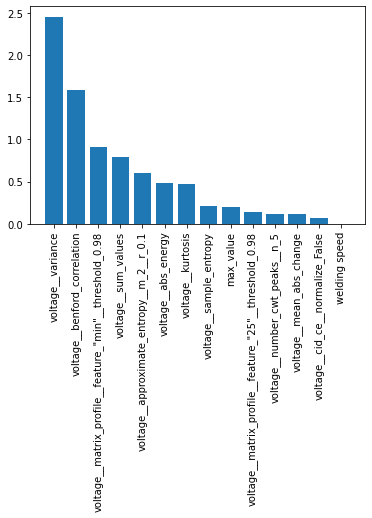

In [12]:
type_model(LogisticRegression, feature_list = features_imp)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       205
           1       0.99      0.99      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.97      0.96      0.97      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__variance': 0.34692, 'voltage__abs_energy': 0.18101, 'max_value': 0.11804, 'voltage__mean_abs_change': 0.08706, 'voltage__approximate_entropy__m_2__r_0.1': 0.07, 'voltage__benford_correlation': 0.06403, 'voltage__sample_entropy': 0.04028, 'voltage__sum_values': 0.03871, 'voltage__cid_ce__normalize_False': 0.01921, 'voltage__kurtosis': 0.01272, 'voltage__matrix_profile__feature_"min"__threshold_0.98': 0.00966, 'voltage__matrix_profile__feature_"25"__thresh

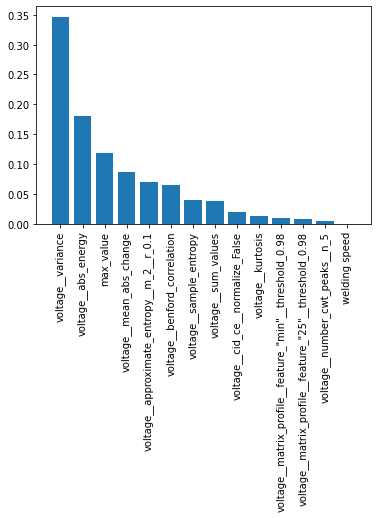

In [13]:
type_model(RandomForestClassifier, feature_list = features_imp)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       205
           1       0.99      0.99      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.96      0.95      0.95      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__variance': 0.88865, 'voltage__kurtosis': 0.02627, 'voltage__mean_abs_change': 0.02042, 'max_value': 0.01877, 'voltage__benford_correlation': 0.01655, 'voltage__approximate_entropy__m_2__r_0.1': 0.01119, 'voltage__matrix_profile__feature_"25"__threshold_0.98': 0.00574, 'voltage__sum_values': 0.00555, 'voltage__number_cwt_peaks__n_5': 0.00447, 'voltage__abs_energy': 0.00239, 'voltage__sample_entropy': 0.0, 'voltage__matrix_profile__feature_"min"__threshold

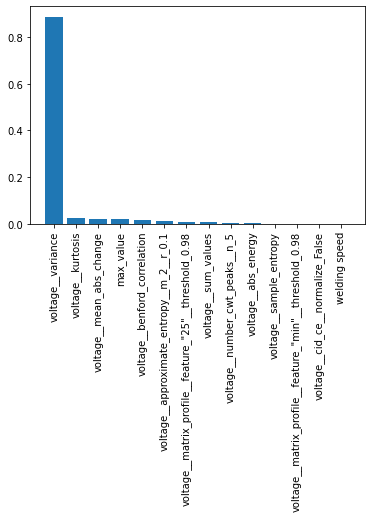

In [14]:
type_model(DecisionTreeClassifier, feature_list = features_imp)

c:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\test\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       205
           1       0.99      0.99      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.97      0.97      0.97      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__variance': 0.77011, 'voltage__kurtosis': 0.04691, 'max_value': 0.03696, 'voltage__sample_entropy': 0.02522, 'voltage__approximate_entropy__m_2__r_0.

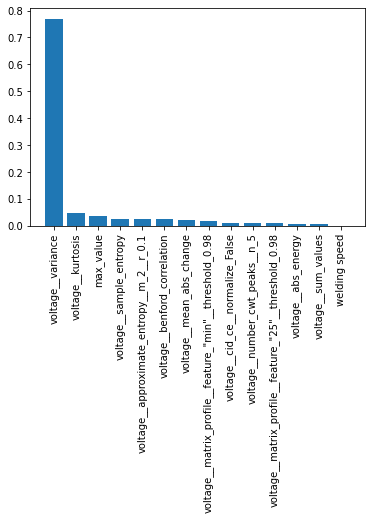

In [15]:
type_model(XGBClassifier, feature_list = features_imp)

In [16]:
normalized_data_non_anomolus = type_normalization(normalization=True, standarization= False, features = features_imp_full, data_frame=data_3)

X_train, X_test, y_train, y_test = train_test_split(normalized_data_non_anomolus, y, test_size=0.33, random_state=42, shuffle=True)

print(y_test[100:200])
test_var = True
if X_test.shape[1] == len(features_imp_full):
    test_var == True
else: 
    test_var == False

print('test_of_data_change_passed_{}'.format(test_var))

+++++++++   Normalization  +++++++++++
6117    1
4225    1
3810    1
1174    1
2796    1
       ..
584     1
1257    1
4521    1
1368    1
2995    1
Name: target, Length: 100, dtype: int64
test_of_data_change_passed_True


better than less features

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       205
           1       0.99      1.00      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.98      0.95      0.96      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__benford_correlation': 4.61917, 'voltage__skewness': 3.98158, 'voltage__variance': 3.73546, 'voltage__variation_coefficient': 3.50447, 'voltage__approximate_entropy__m_2__r_0.1': 3.19784, 'max_value': 2.4675, 'voltage__root_mean_square': 2.37338, 'voltage__c3__lag_1': 2.34247, 'voltage__abs_energy': 2.00631, 'voltage__sample_entropy': 1.83163, 'voltage__mean_abs_change': 1.47495, 'voltage__approximate_entropy__m_2__r_0.7': 1.06466, 'voltage__kurtosis': 1.

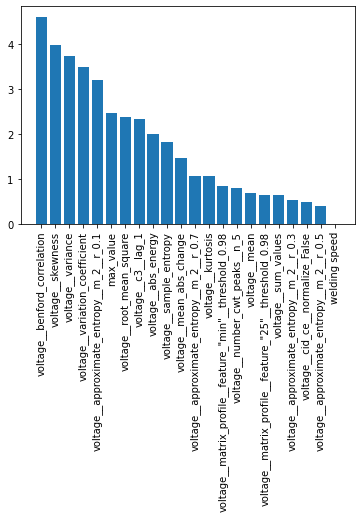

In [17]:
type_model(LogisticRegression, feature_list = features_imp_full)

c:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\test\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       205
           1       0.99      0.99      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.97      0.96      0.97      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__variance': 0.73212, 'voltage__kurtosis': 0.05093, 'max_value': 0.0267, 'voltage__approximate_entropy__m_2__r_0.7': 0.0195, 'voltage__benford_correla

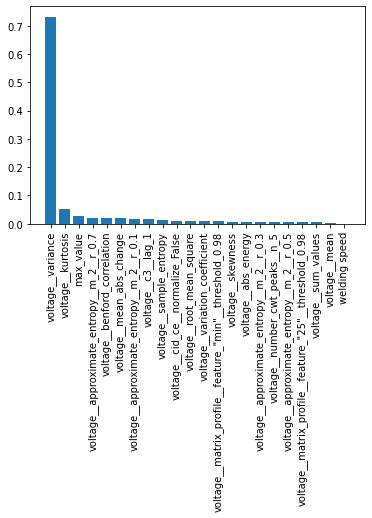

In [18]:
type_model(XGBClassifier, feature_list = features_imp_full)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       205
           1       0.99      0.99      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.97      0.97      0.97      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__variance': 0.24692, 'voltage__c3__lag_1': 0.14171, 'voltage__root_mean_square': 0.13167, 'voltage__abs_energy': 0.12378, 'max_value': 0.08518, 'voltage__mean_abs_change': 0.05211, 'voltage__approximate_entropy__m_2__r_0.1': 0.04402, 'voltage__mean': 0.03228, 'voltage__benford_correlation': 0.03225, 'voltage__sum_values': 0.02036, 'voltage__sample_entropy': 0.01988, 'voltage__skewness': 0.01928, 'voltage__variation_coefficient': 0.01704, 'voltage__kurtosi

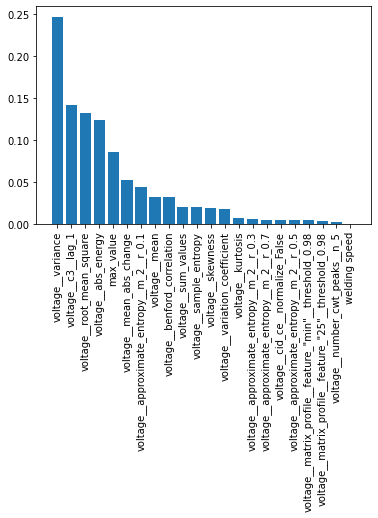

In [19]:
type_model(RandomForestClassifier, feature_list = features_imp_full)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       205
           1       0.99      0.99      0.99      2116

    accuracy                           0.98      2321
   macro avg       0.95      0.95      0.95      2321
weighted avg       0.98      0.98      0.98      2321

{'voltage__variance': 0.89308, 'voltage__kurtosis': 0.02619, 'max_value': 0.01487, 'voltage__mean_abs_change': 0.01213, 'voltage__approximate_entropy__m_2__r_0.7': 0.00863, 'voltage__approximate_entropy__m_2__r_0.3': 0.00813, 'voltage__root_mean_square': 0.00668, 'voltage__mean': 0.00555, 'voltage__benford_correlation': 0.00522, 'voltage__sample_entropy': 0.00418, 'voltage__variation_coefficient': 0.00278, 'voltage__approximate_entropy__m_2__r_0.1': 0.00275, 'volta

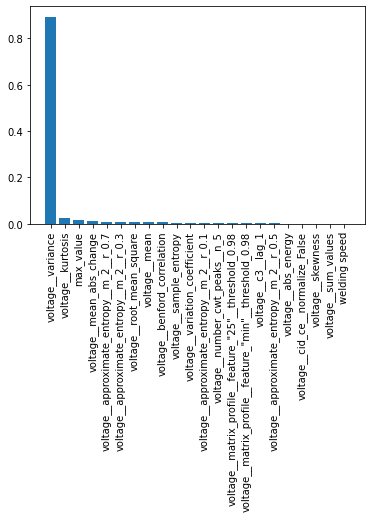

In [20]:
type_model(DecisionTreeClassifier, feature_list = features_imp_full)

In [21]:
normalized_data_non_anomolus = type_normalization(normalization=False, standarization= True, features = features_imp_full, data_frame=data_3)

X_train, X_test, y_train, y_test = train_test_split(normalized_data_non_anomolus, y, test_size=0.33, random_state=42, shuffle=True)

print(y_test[100:200])

+++++++++   Standarization  +++++++++++
6117    1
4225    1
3810    1
1174    1
2796    1
       ..
584     1
1257    1
4521    1
1368    1
2995    1
Name: target, Length: 100, dtype: int64


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       205
           1       0.99      1.00      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.97      0.96      0.96      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__root_mean_square': 1.91557, 'voltage__c3__lag_1': 1.83366, 'voltage__benford_correlation': 1.7523, 'voltage__skewness': 1.64285, 'voltage__variation_coefficient': 1.36882, 'voltage__mean': 1.19099, 'voltage__approximate_entropy__m_2__r_0.7': 1.00783, 'voltage__matrix_profile__feature_"min"__threshold_0.98': 0.76561, 'voltage__approximate_entropy__m_2__r_0.3': 0.67877, 'voltage__sum_values': 0.57425, 'voltage__sample_entropy': 0.52005, 'voltage__variance'

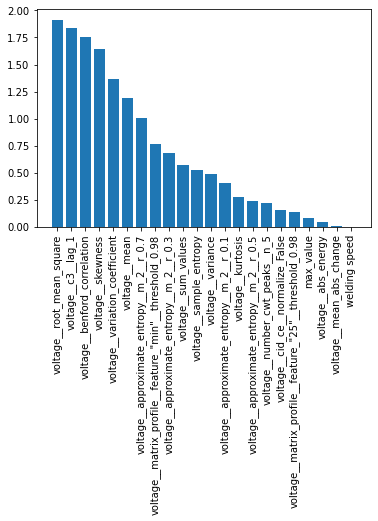

In [22]:
type_model(LogisticRegression, feature_list = features_imp_full )

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       205
           1       0.99      1.00      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.97      0.96      0.97      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__variance': 0.21225, 'voltage__c3__lag_1': 0.17279, 'voltage__root_mean_square': 0.11451, 'voltage__abs_energy': 0.10645, 'max_value': 0.08724, 'voltage__approximate_entropy__m_2__r_0.1': 0.06387, 'voltage__mean_abs_change': 0.05315, 'voltage__benford_correlation': 0.0444, 'voltage__skewness': 0.02225, 'voltage__mean': 0.02135, 'voltage__sample_entropy': 0.01931, 'voltage__variation_coefficient': 0.01814, 'voltage__sum_values': 0.01616, 'voltage__cid_ce__

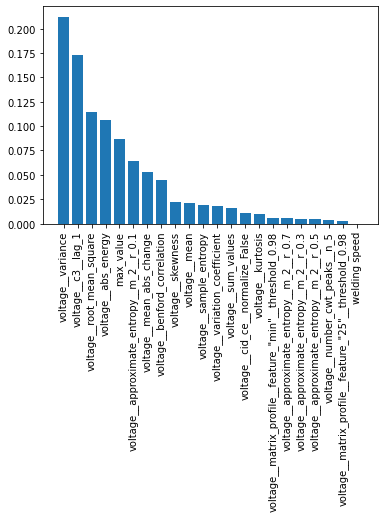

In [23]:
type_model(RandomForestClassifier, feature_list = features_imp_full)

c:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\test\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       205
           1       0.99      0.99      0.99      2116

    accuracy                           0.99      2321
   macro avg       0.97      0.96      0.97      2321
weighted avg       0.99      0.99      0.99      2321

{'voltage__variance': 0.73212, 'voltage__kurtosis': 0.05093, 'max_value': 0.0267, 'voltage__approximate_entropy__m_2__r_0.7': 0.0195, 'voltage__benford_correla

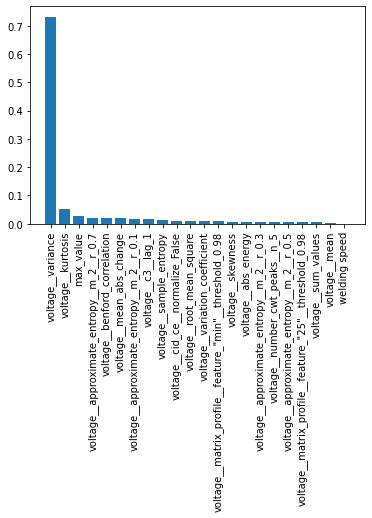

In [24]:
type_model(XGBClassifier, feature_list = features_imp_full)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       205
           1       0.99      0.99      0.99      2116

    accuracy                           0.98      2321
   macro avg       0.95      0.95      0.95      2321
weighted avg       0.98      0.98      0.98      2321

{'voltage__variance': 0.88883, 'voltage__kurtosis': 0.02983, 'max_value': 0.01487, 'voltage__mean_abs_change': 0.01178, 'voltage__approximate_entropy__m_2__r_0.7': 0.01135, 'voltage__sum_values': 0.00991, 'voltage__benford_correlation': 0.00761, 'voltage__approximate_entropy__m_2__r_0.3': 0.00542, 'voltage__abs_energy': 0.00467, 'voltage__sample_entropy': 0.00418, 'voltage__variation_coefficient': 0.00278, 'voltage__number_cwt_peaks__n_5': 0.00261, 'voltage__matrix

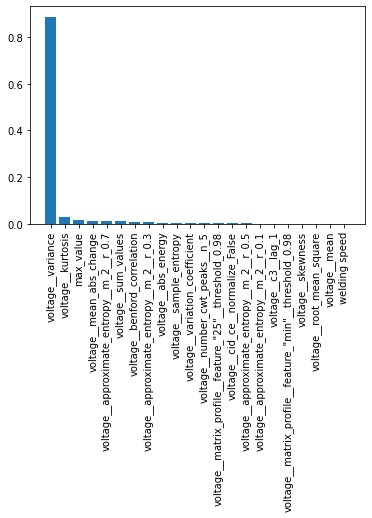

In [25]:
type_model(DecisionTreeClassifier, feature_list = features_imp_full)

In [ ]:
# data_feature_1 = pd.read_excel(r'C:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\Steel_wall2_Misc\data_full\data_full_1_sec.xlsx')


# data_feature_0p16 = pd.read_excel(r'C:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\Steel_wall2_Misc\data_full\data_full_op16.xlsx')


# data_feature_0p08 = pd.read_excel(r'C:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\Steel_wall2_Misc\data_full\data_full_0p08.xlsx')





Classification model

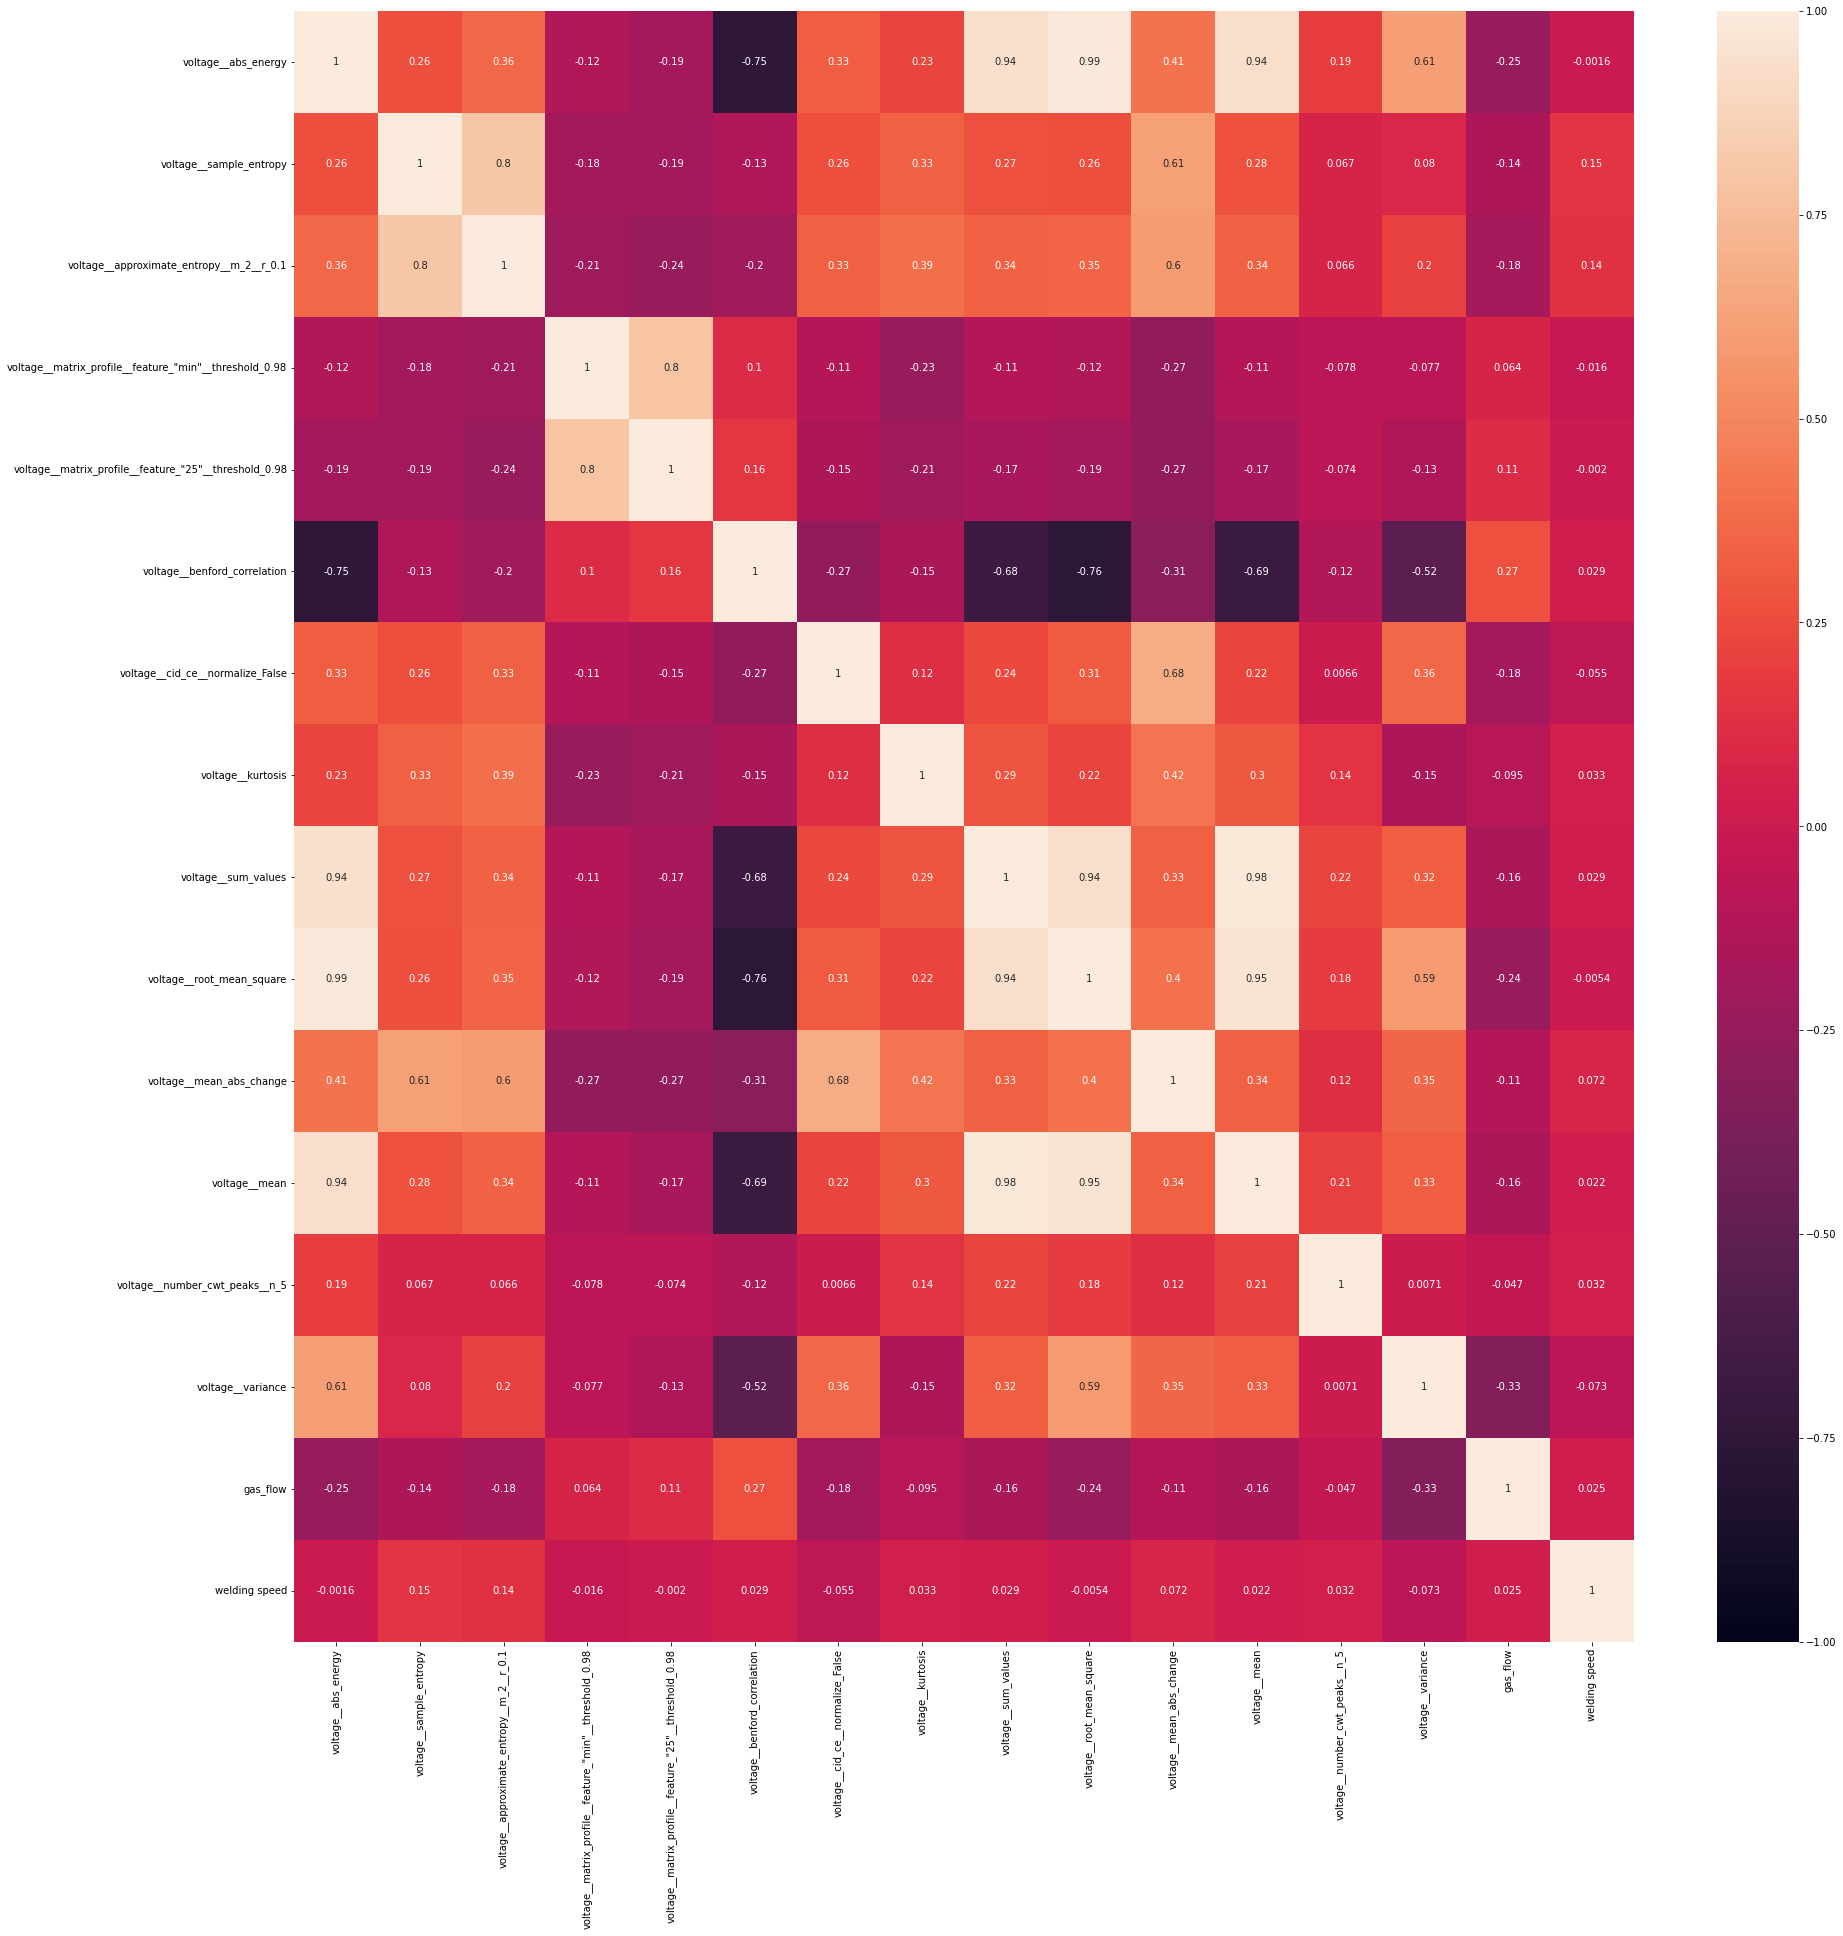

In [ ]:
plt.figure(figsize=(30, 30))
#features_imp = ['voltage__c3__lag_1', 'voltage__abs_energy', 'voltage__sample_entropy', 'voltage__approximate_entropy__m_2__r_0.1', 'voltage__approximate_entropy__m_2__r_0.3', 'voltage__approximate_entropy__m_2__r_0.5', 'voltage__approximate_entropy__m_2__r_0.7','voltage__matrix_profile__feature_"min"__threshold_0.98' ,   'voltage__matrix_profile__feature_"25"__threshold_0.98', 'voltage__benford_correlation', 'voltage__cid_ce__normalize_False','voltage__kurtosis', 'voltage__skewness','voltage__sum_values', 'voltage__root_mean_square', 'voltage__mean_abs_change', 'voltage__mean' , 'voltage__number_cwt_peaks__n_5','voltage__variance', 'voltage__variation_coefficient', 'voltage__standard_deviation', 'gas_flow', 'welding speed']
data_1sec = pd.read_excel(r'C:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\Steel_wall2_Misc\data_full\data_full_0.04.xlsx')

data_feature = data_1sec[features_imp]

#data_feature.corr().head()
heatmap = sns.heatmap(data_feature.corr(), vmin=-1, vmax=1, annot=True)

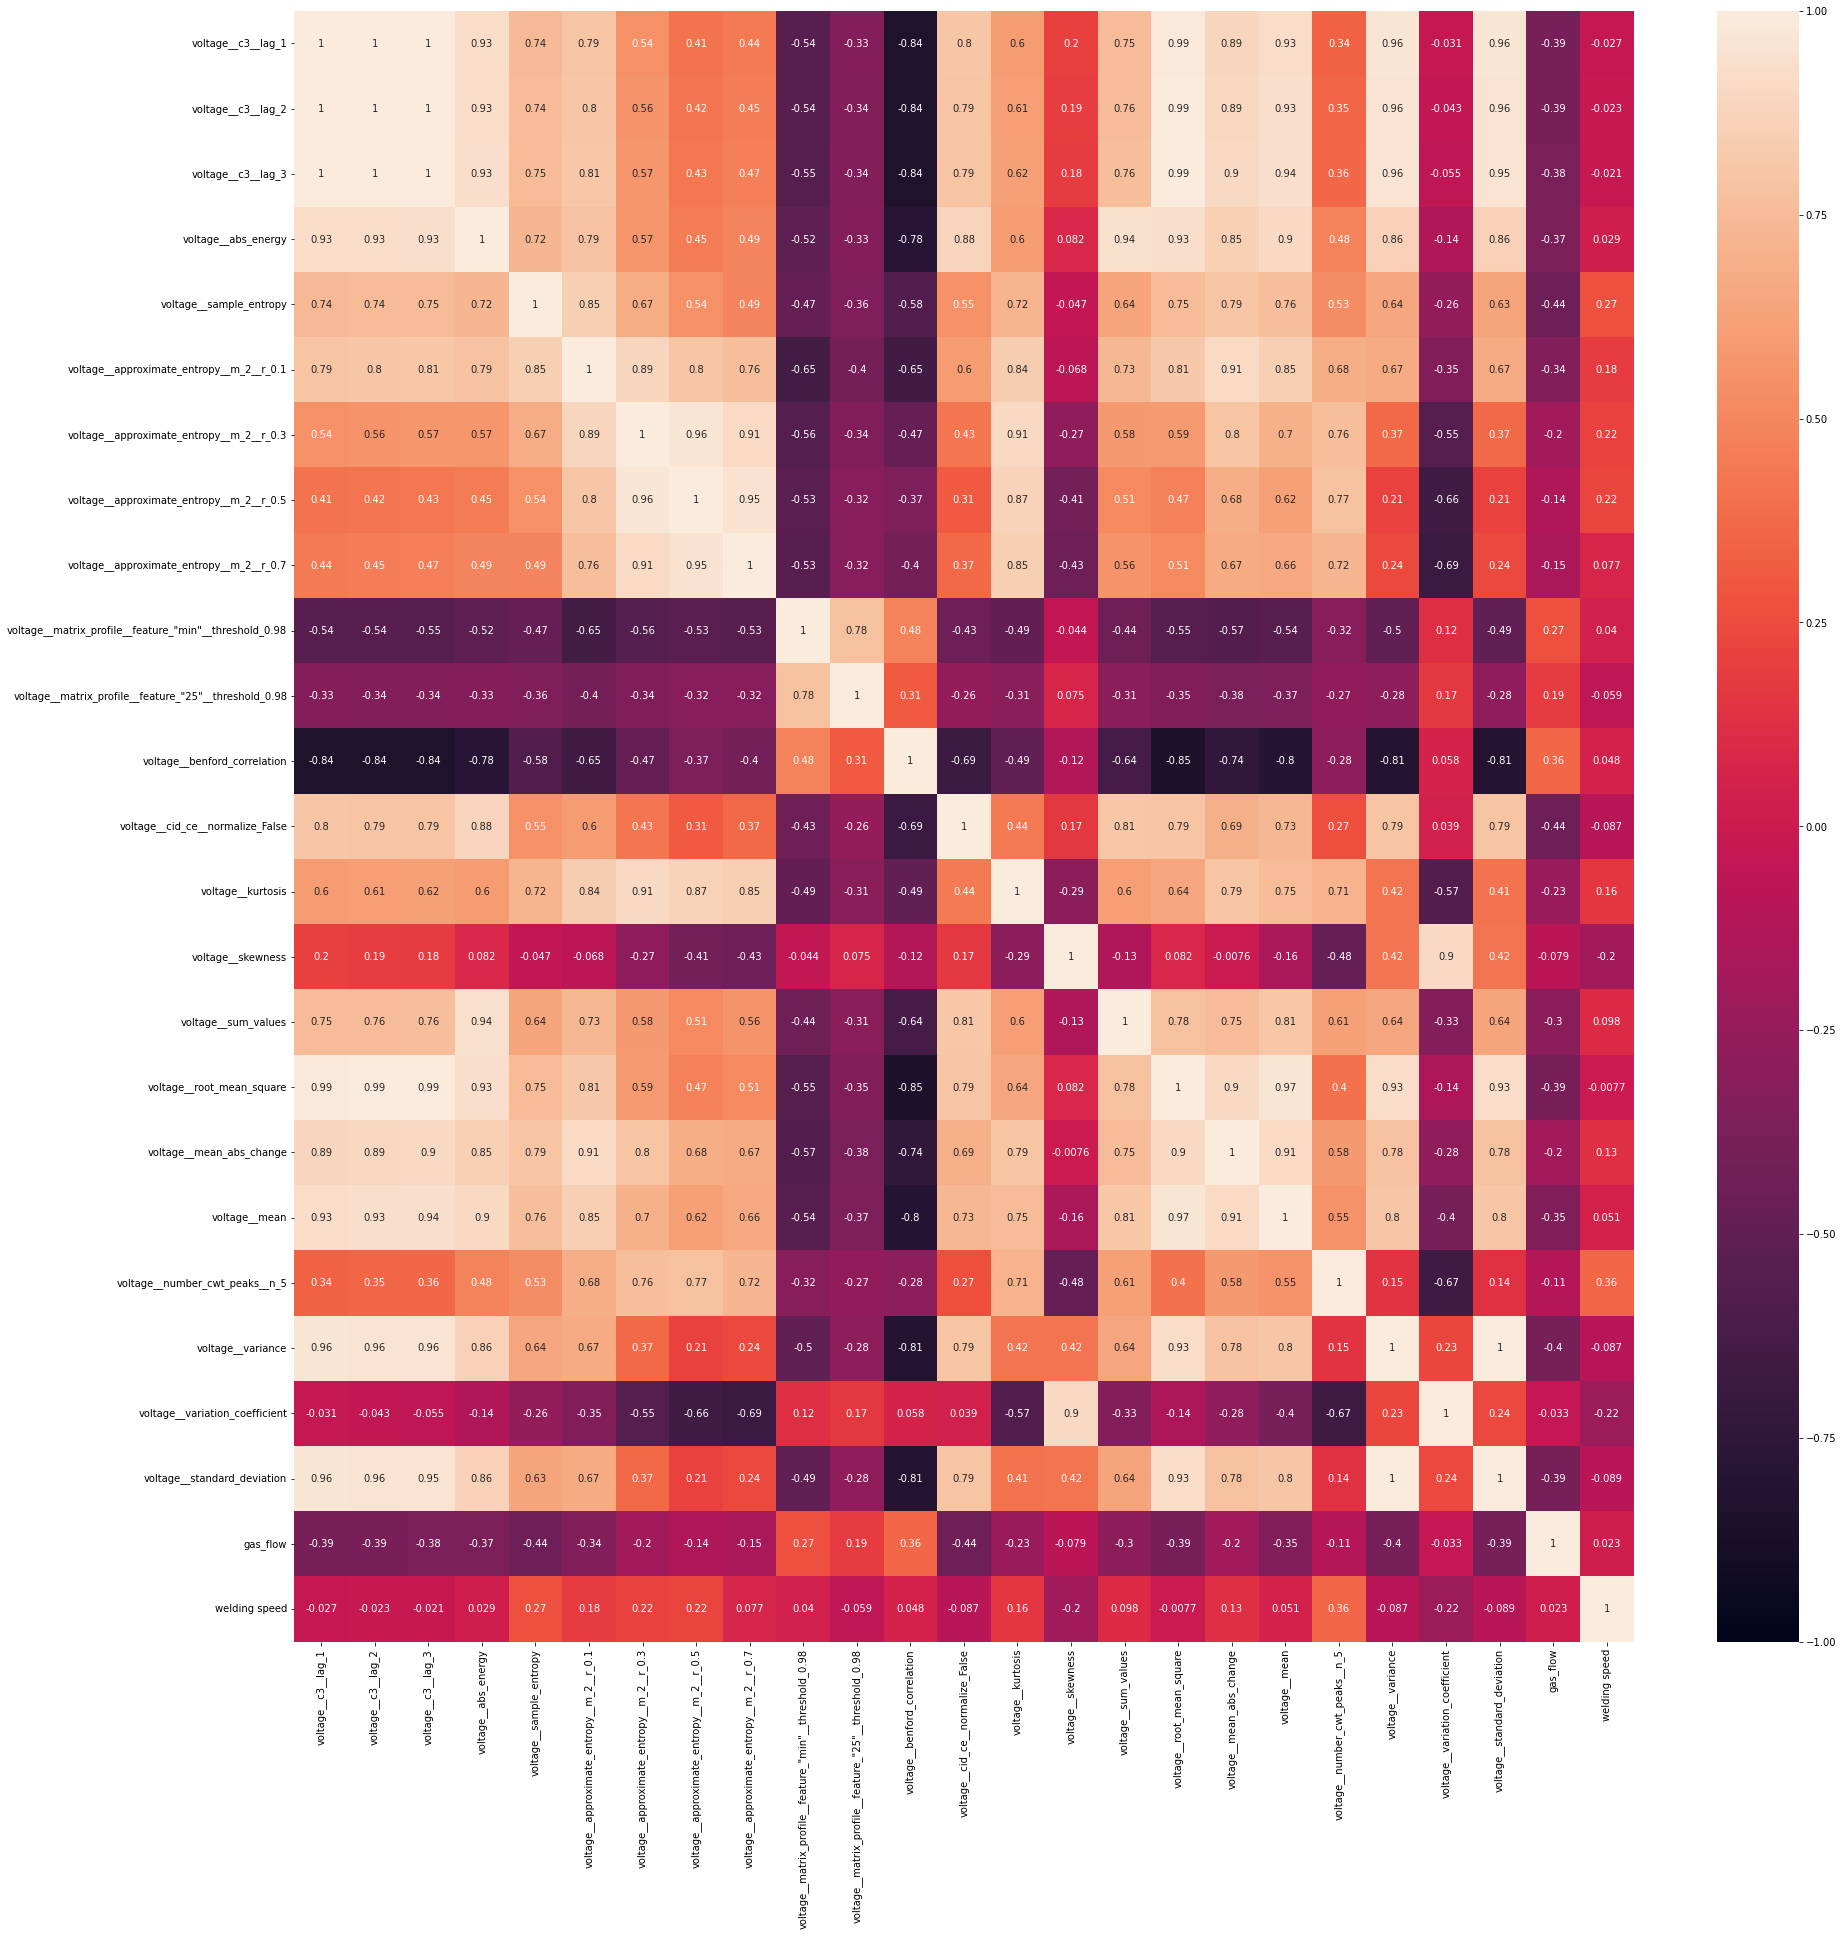

In [ ]:
plt.figure(figsize=(30, 30))
features_imp = ['voltage__c3__lag_1', 'voltage__c3__lag_2','voltage__c3__lag_3','voltage__abs_energy', 'voltage__sample_entropy', 'voltage__approximate_entropy__m_2__r_0.1', 'voltage__approximate_entropy__m_2__r_0.3', 'voltage__approximate_entropy__m_2__r_0.5', 'voltage__approximate_entropy__m_2__r_0.7','voltage__matrix_profile__feature_"min"__threshold_0.98' ,   'voltage__matrix_profile__feature_"25"__threshold_0.98', 'voltage__benford_correlation', 'voltage__cid_ce__normalize_False','voltage__kurtosis', 'voltage__skewness','voltage__sum_values', 'voltage__root_mean_square', 'voltage__mean_abs_change', 'voltage__mean' , 'voltage__number_cwt_peaks__n_5','voltage__variance', 'voltage__variation_coefficient', 'voltage__standard_deviation', 'gas_flow', 'welding speed']
data_feature = pd.read_excel(r'C:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\Steel_wall2_Misc\data_full\data_full_1_sec.xlsx')
data_feature = data_feature[features_imp]

data_feature.corr().head()
#heatmap = sns.heatmap(data_feature.corr(), vmin=-1, vmax=1, annot=True)

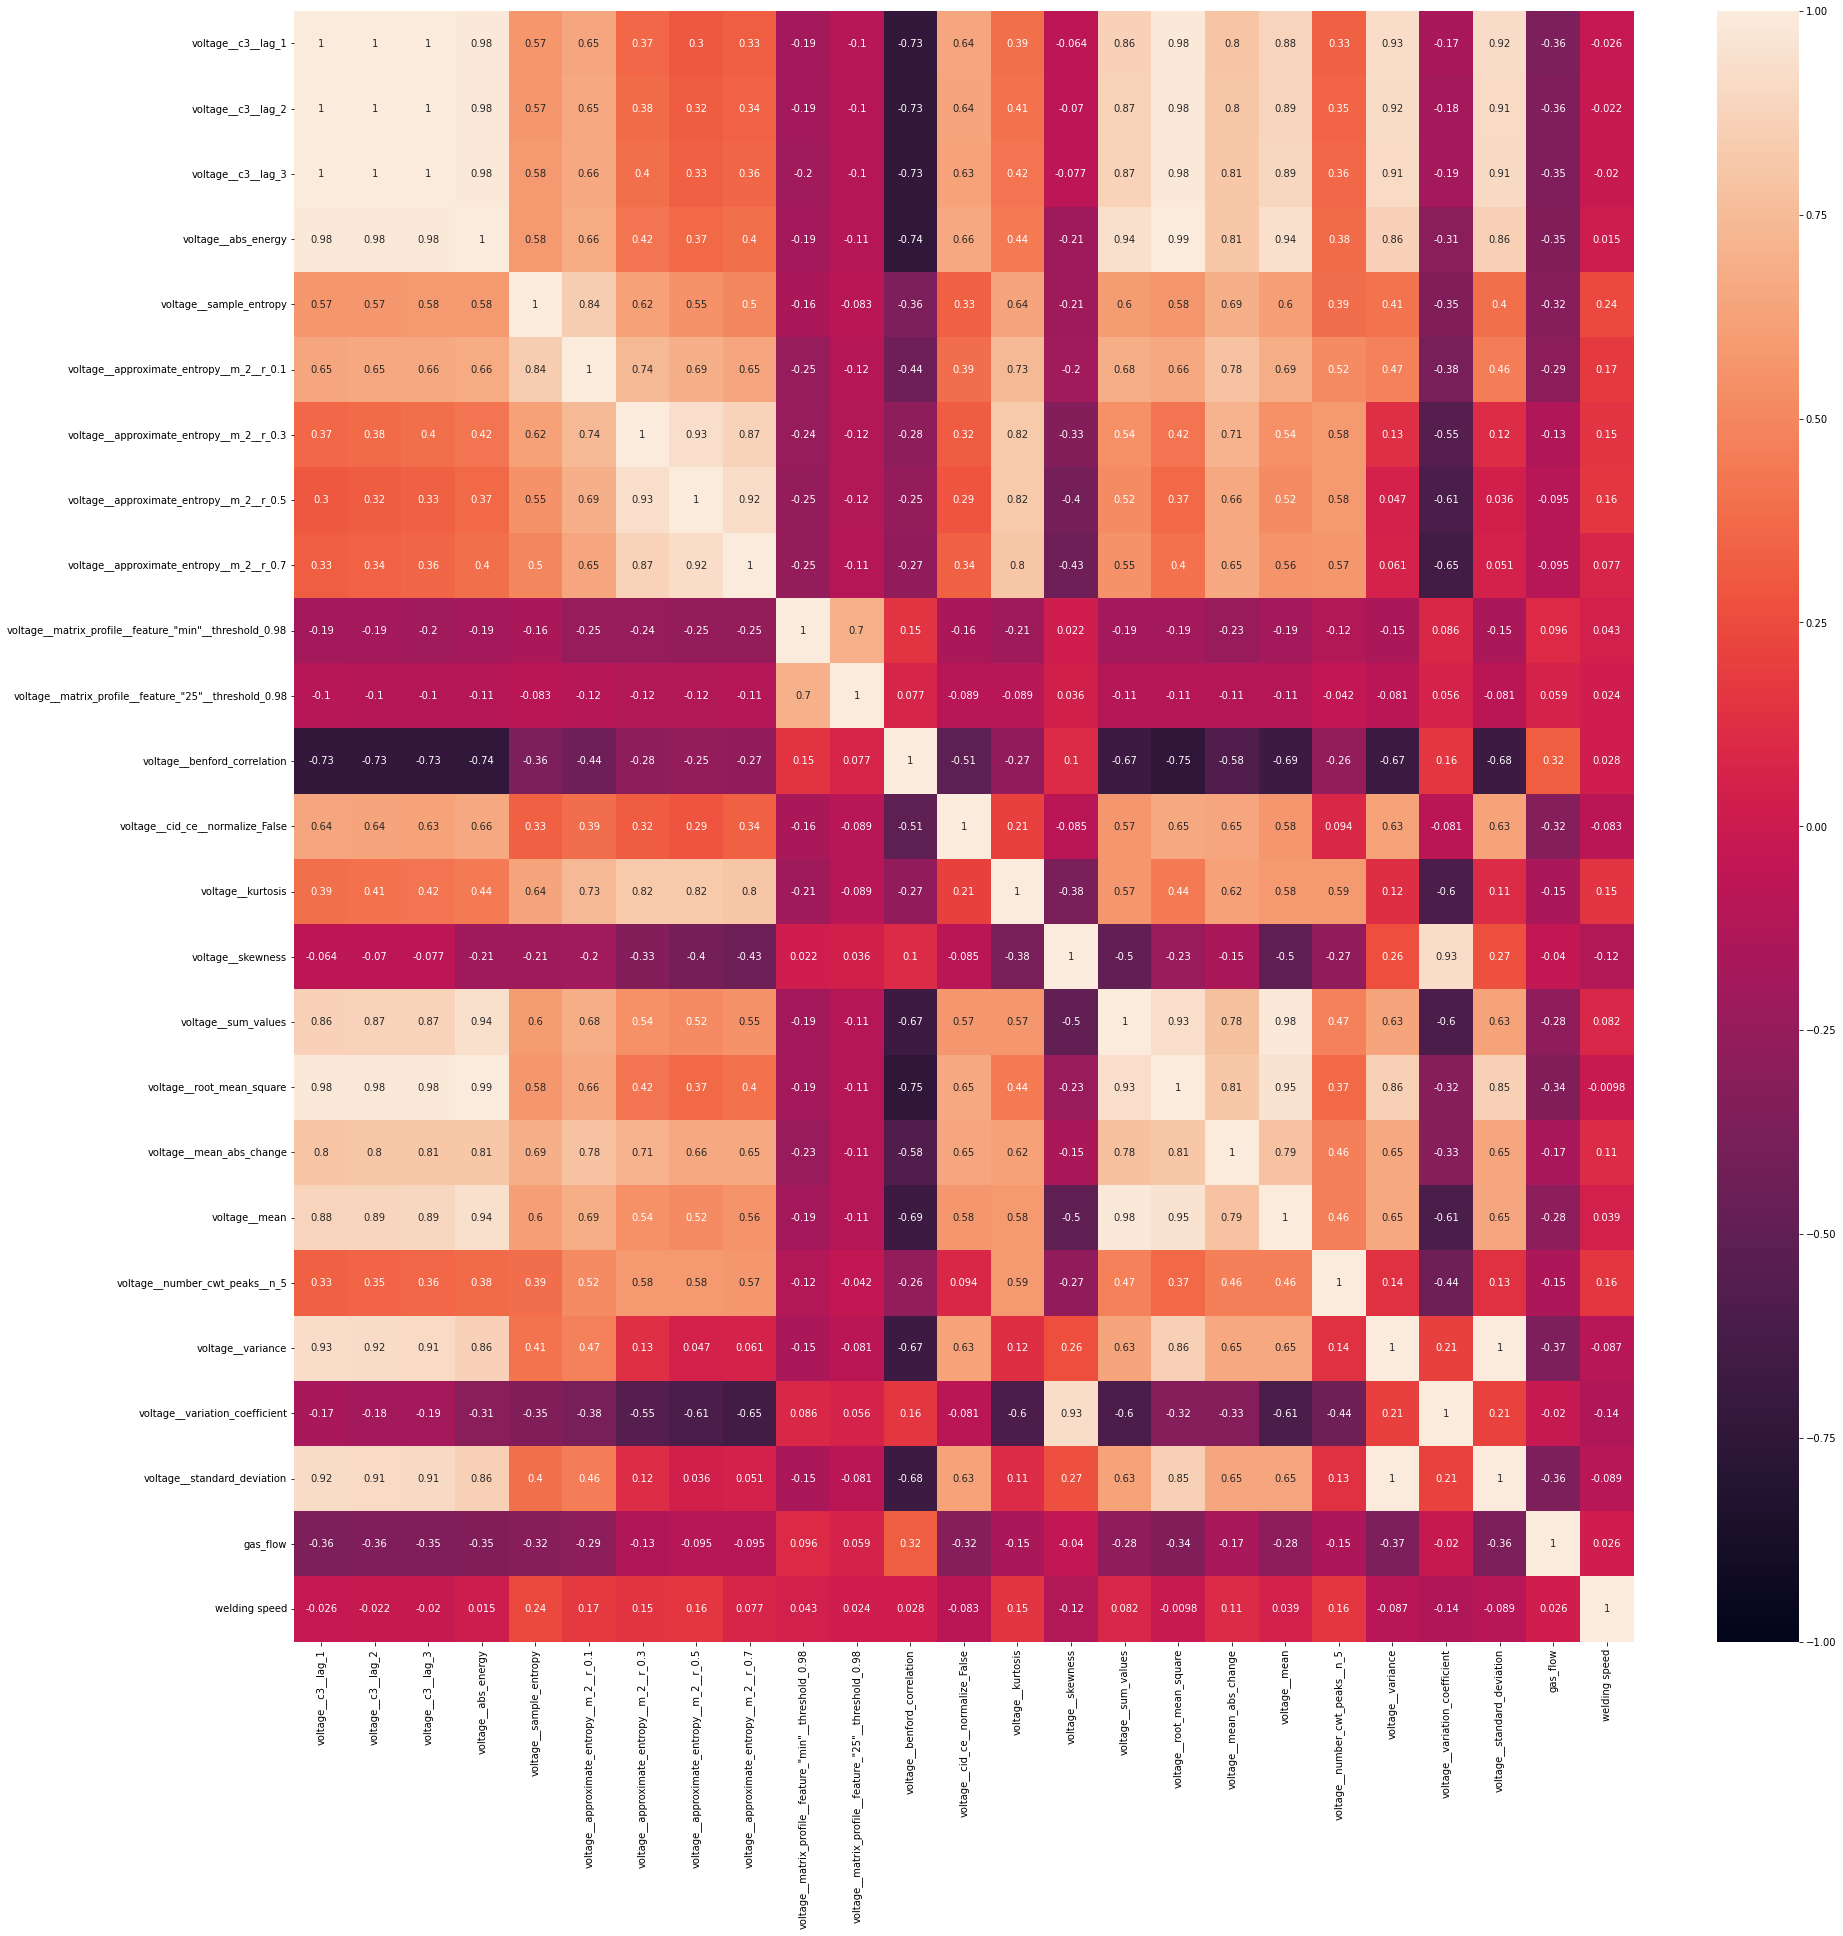

In [ ]:
plt.figure(figsize=(30, 30))
features_imp = ['voltage__c3__lag_1', 'voltage__c3__lag_2','voltage__c3__lag_3','voltage__abs_energy', 'voltage__sample_entropy', 'voltage__approximate_entropy__m_2__r_0.1', 'voltage__approximate_entropy__m_2__r_0.3', 'voltage__approximate_entropy__m_2__r_0.5', 'voltage__approximate_entropy__m_2__r_0.7','voltage__matrix_profile__feature_"min"__threshold_0.98' ,   'voltage__matrix_profile__feature_"25"__threshold_0.98', 'voltage__benford_correlation', 'voltage__cid_ce__normalize_False','voltage__kurtosis', 'voltage__skewness','voltage__sum_values', 'voltage__root_mean_square', 'voltage__mean_abs_change', 'voltage__mean' , 'voltage__number_cwt_peaks__n_5','voltage__variance', 'voltage__variation_coefficient', 'voltage__standard_deviation', 'gas_flow', 'welding speed']
data_feature = pd.read_excel(r'C:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\Steel_wall2_Misc\data_full\data_full_op16.xlsx')
data_feature = data_feature[features_imp]

data_feature.corr()
heatmap = sns.heatmap(data_feature.corr(), vmin=-1, vmax=1, annot=True)

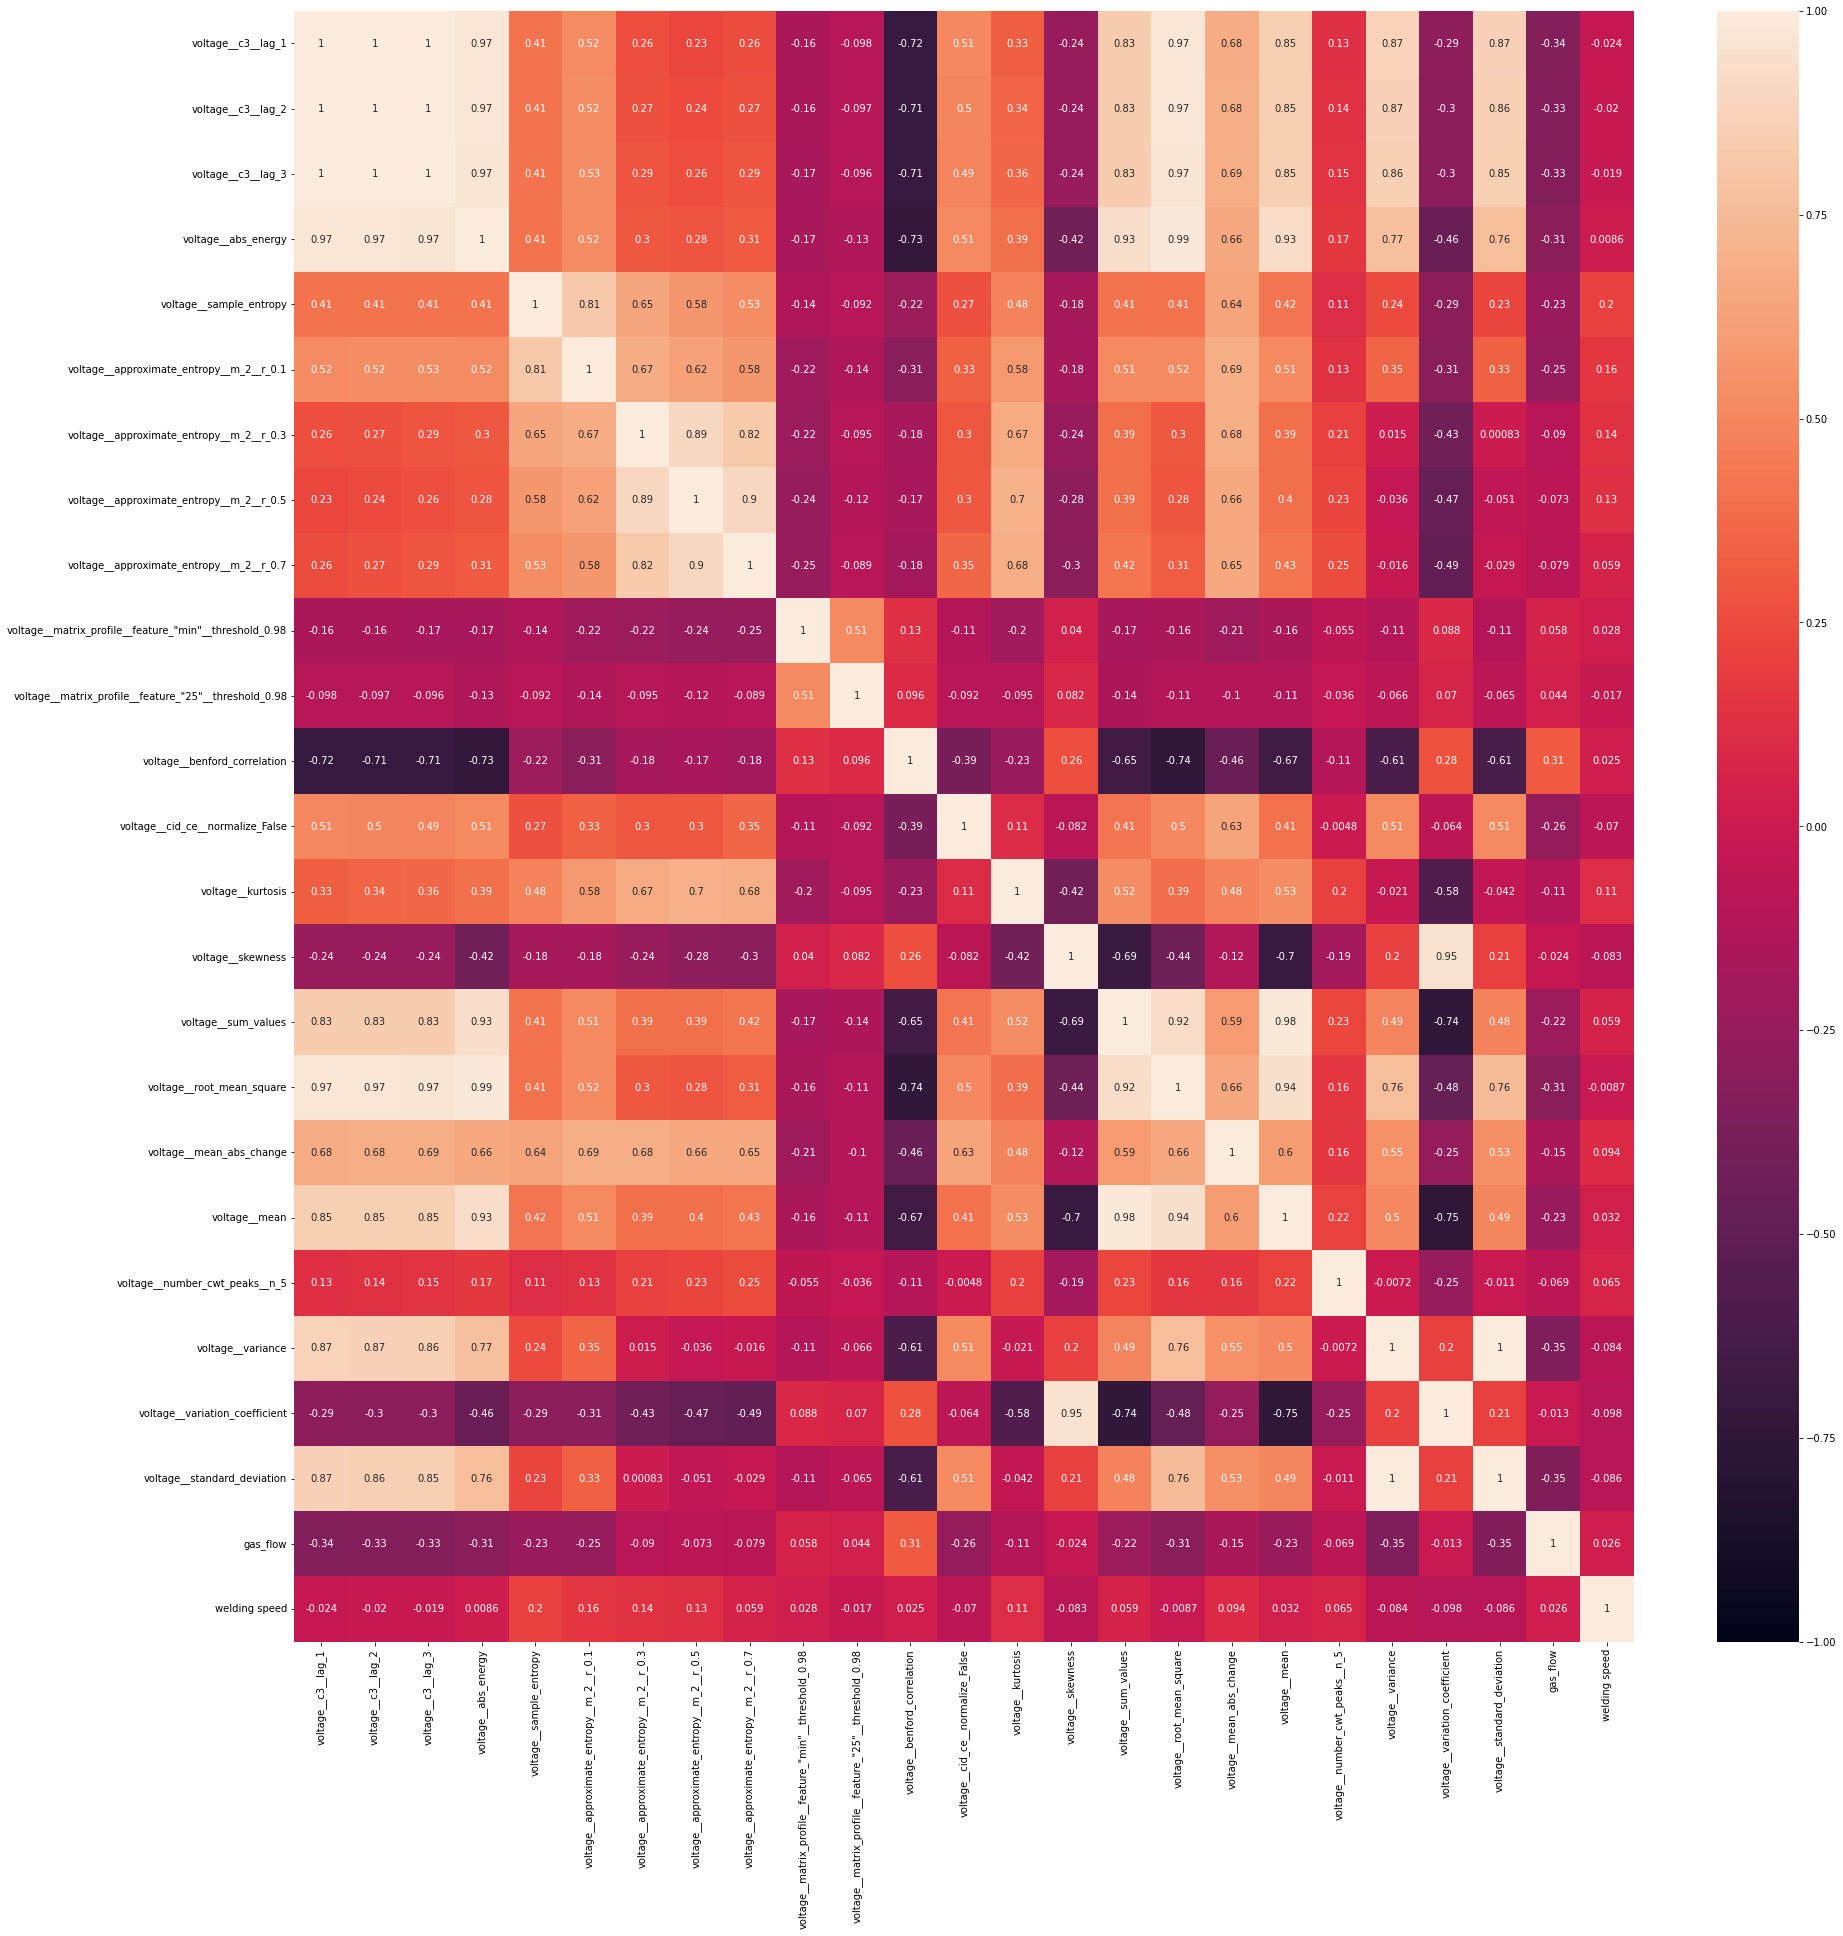

In [ ]:
plt.figure(figsize=(30, 30))
features_imp = ['voltage__c3__lag_1', 'voltage__c3__lag_2','voltage__c3__lag_3','voltage__abs_energy', 'voltage__sample_entropy', 'voltage__approximate_entropy__m_2__r_0.1', 'voltage__approximate_entropy__m_2__r_0.3', 'voltage__approximate_entropy__m_2__r_0.5', 'voltage__approximate_entropy__m_2__r_0.7','voltage__matrix_profile__feature_"min"__threshold_0.98' ,   'voltage__matrix_profile__feature_"25"__threshold_0.98', 'voltage__benford_correlation', 'voltage__cid_ce__normalize_False','voltage__kurtosis', 'voltage__skewness','voltage__sum_values', 'voltage__root_mean_square', 'voltage__mean_abs_change', 'voltage__mean' , 'voltage__number_cwt_peaks__n_5','voltage__variance', 'voltage__variation_coefficient', 'voltage__standard_deviation', 'gas_flow', 'welding speed']
data_feature = pd.read_excel(r'C:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\Steel_wall2_Misc\data_full\data_full_0p08.xlsx')
data_feature = data_feature[features_imp]

data_feature.corr()
heatmap = sns.heatmap(data_feature.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
#sns.clustermap(data_feature, vmin=-1, vmax=1, cmap="Blues")